In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("~/Downloads/past_sales.csv")

In [3]:
df

,Id,loc_id,Property_Details_address,Side,Price,Sold_Date
0,1,1,"103 Singingwood Dr, Holbrook, NY 11741",Seller,"$343,000",03/30/2020
1,2,1,"226 Fairfield Dr E, Holbrook, NY 11741",Seller,"$535,000",03/30/2020
2,3,1,"631 Greenbelt Pkwy W, Holbrook, NY 11741",Seller,"$390,000",03/26/2020
3,4,1,"115 Dari Dr, Holbrook, NY 11741",Seller,"$353,000",03/12/2020
4,5,1,"1 Saggese Ln, Nesconset, NY 11767",Buyer,"$425,000",02/14/2020
...,...,...,...,...,...,...
999995,1000852,787086,"6101 Township Road 175, Cardington, OH 43315",Buyer,"$114,900",12/18/2014
999996,1000853,255202,"2312 Webster Ave, Joliet, IL 60436",Seller,"$133,000",01/16/2018
999997,1000854,563205,"1310 Forest Ave, Cambridge, OH 43725",Seller,"$130,000",02/06/2019
999998,1000855,549605,"1000 Elm St, Piqua, OH 45356",Buyer,"$91,500",06/06/2018


In [4]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Id                              0
loc_id                          0
Property_Details_address    25167
Side                            0
Price                           0
Sold_Date                       0
dtype: int64


In [5]:
### Converting Sold_Date to datetime
df['Sold_Date'] = pd.to_datetime(df['Sold_Date'])

In [6]:
### Adding Month and Year columns for analysis
df['Month'] = df['Sold_Date'].dt.month
df['Year'] = df['Sold_Date'].dt.year

In [7]:
print("Unique Price values before cleaning:", df['Price'].unique())

Unique Price values before cleaning: ['$343,000' '$535,000' '$390,000' ... '$49,873' '$555,505' '$351,111']


In [8]:
### Cleaning the Price column
df['Price'] = df['Price'].replace('[\$,]', '', regex=True) 
df['Price'] = df['Price'].replace('--', None)           
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') 

In [9]:
### Fill missing values if necessary
if df['Price'].isnull().any():
    print("Missing values detected. Filling with the mean price.")
    df['Price'] = df['Price'].fillna(df['Price'].mean())

Missing values detected. Filling with the mean price.


In [10]:
df.describe()

,Id,loc_id,Price,Month,Year
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,5.006537e+05,4.621559e+05,3.105335e+05,6.661636,2015.328495
std,2.887999e+05,2.768370e+05,2.825262e+06,3.234927,3.809671
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1969.000000
25%,2.505668e+05,2.257318e+05,1.365000e+05,4.000000,2014.000000
50%,5.006515e+05,4.623460e+05,2.300000e+05,7.000000,2016.000000
75%,7.507592e+05,6.880810e+05,3.470000e+05,9.000000,2018.000000
max,1.000856e+06,1.372145e+06,1.687002e+09,12.000000,2020.000000


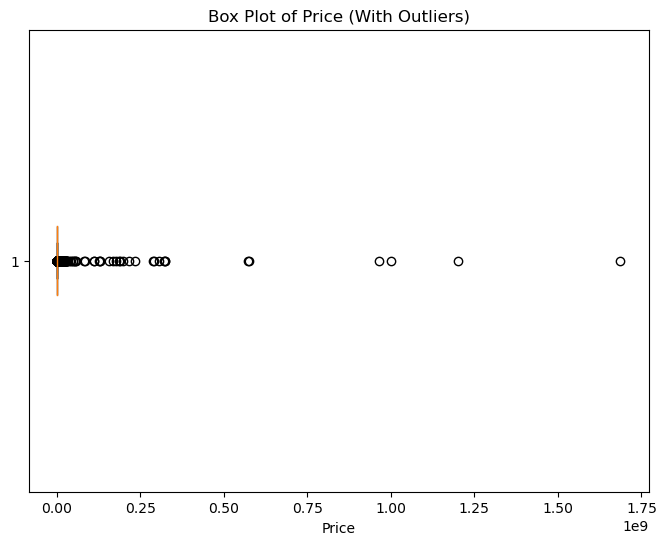

In [11]:
# Plotting the box plot including outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df["Price"], vert=False, patch_artist=True)
plt.title("Box Plot of Price (With Outliers)")
plt.xlabel("Price")
plt.show()

In [12]:
### Adding a feature for Price per loc_id average
df['Avg_Price_loc_id'] = df.groupby('loc_id')['Price'].transform('mean')

In [13]:
### Adding a feature for whether the property was sold above or below loc_id average
df['Above_Avg'] = df['Price'] > df['Avg_Price_loc_id']

In [14]:
df['Total_Sales_per_Loc'] = df.groupby('loc_id')['Id'].transform('count')

In [15]:
df

,Id,loc_id,Property_Details_address,Side,Price,Sold_Date,Month,Year,Avg_Price_loc_id,Above_Avg,Total_Sales_per_Loc
0,1,1,"103 Singingwood Dr, Holbrook, NY 11741",Seller,343000.0,2020-03-30,3,2020,409200.0,False,5
1,2,1,"226 Fairfield Dr E, Holbrook, NY 11741",Seller,535000.0,2020-03-30,3,2020,409200.0,True,5
2,3,1,"631 Greenbelt Pkwy W, Holbrook, NY 11741",Seller,390000.0,2020-03-26,3,2020,409200.0,False,5
3,4,1,"115 Dari Dr, Holbrook, NY 11741",Seller,353000.0,2020-03-12,3,2020,409200.0,False,5
4,5,1,"1 Saggese Ln, Nesconset, NY 11767",Buyer,425000.0,2020-02-14,2,2020,409200.0,True,5
...,...,...,...,...,...,...,...,...,...,...,...
999995,1000852,787086,"6101 Township Road 175, Cardington, OH 43315",Buyer,114900.0,2014-12-18,12,2014,87700.0,True,2
999996,1000853,255202,"2312 Webster Ave, Joliet, IL 60436",Seller,133000.0,2018-01-16,1,2018,182174.6,False,5
999997,1000854,563205,"1310 Forest Ave, Cambridge, OH 43725",Seller,130000.0,2019-02-06,2,2019,78500.0,True,4
999998,1000855,549605,"1000 Elm St, Piqua, OH 45356",Buyer,91500.0,2018-06-06,6,2018,97875.0,False,4


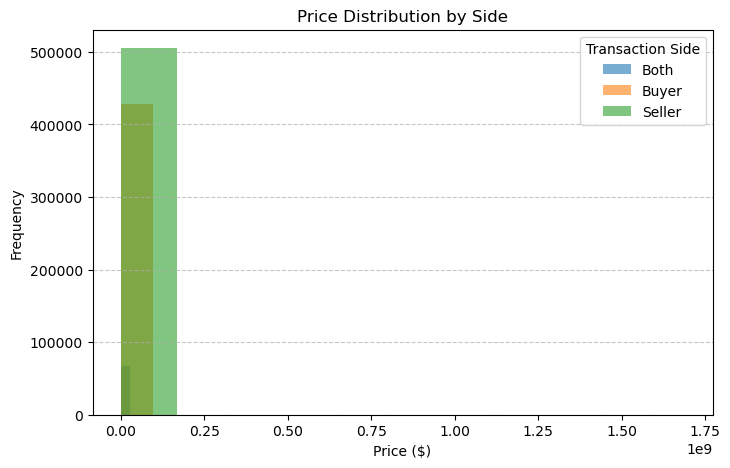

In [16]:
### Price Distribution by Side
plt.figure(figsize=(8, 5))
for side, group in df.groupby('Side'):
    group['Price'].plot(kind='hist', alpha=0.6, label=side, bins=10)

plt.title('Price Distribution by Side')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend(title='Transaction Side')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


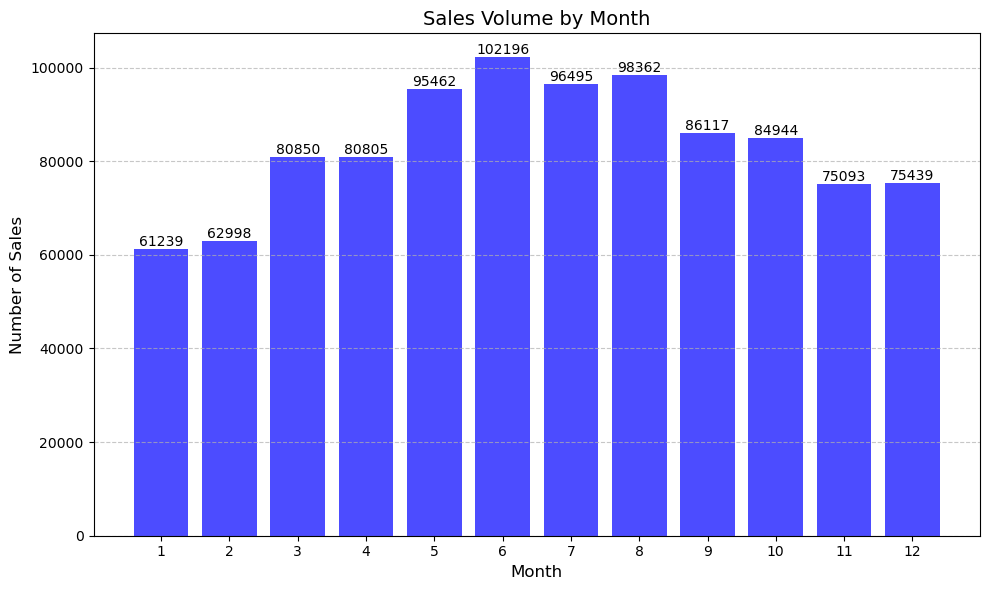

In [17]:
monthly_sales = df.groupby('Month')['Id'].count()

### Plotting Sales Volume by Month
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales.index, monthly_sales.values, color='blue', alpha=0.7)
plt.title('Sales Volume by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=range(1, 13), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

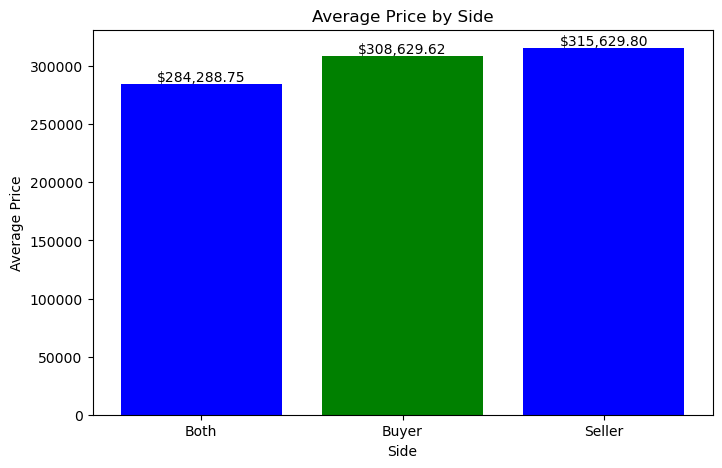

In [18]:
### Average Price by Side
avg_price_side = df.groupby('Side')['Price'].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_price_side.index, avg_price_side.values, color=['blue', 'green'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.2f}', ha='center', va='bottom')
plt.title('Average Price by Side')
plt.xlabel('Side')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [19]:
price_bins = [0, 250000, 500000, 750000, 1000000]
price_labels = ['Low', 'Medium', 'High', 'Very High']

In [20]:
df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

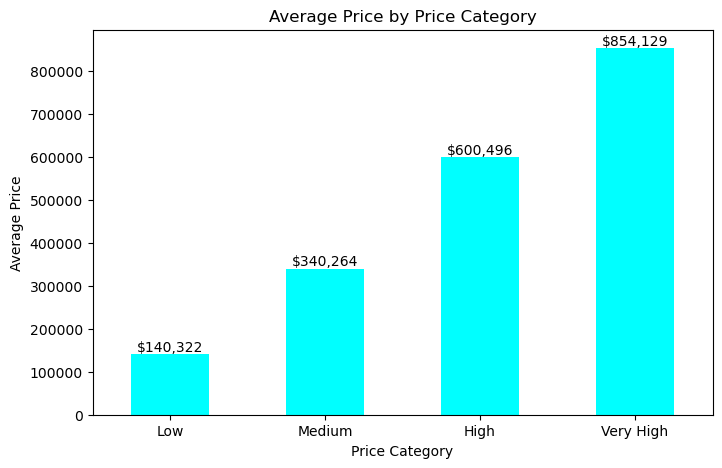

In [21]:
avg_price_category = df.groupby('Price_Category')['Price'].mean()

#### Plot the average price by price category
plt.figure(figsize=(8, 5))
avg_price_category.plot(kind='bar', color='cyan')
plt.title('Average Price by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
for index, value in enumerate(avg_price_category):
    plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom')

plt.show()

In [22]:
#df.to_csv("PastSalesAnalysis.csv", index = False, encoding = "UTF-8")

In [26]:
df

,Id,loc_id,Property_Details_address,Side,Price,Sold_Date,Month,Year,Avg_Price_loc_id,Above_Avg,Total_Sales_per_Loc,Price_Category
0,1,1,"103 Singingwood Dr, Holbrook, NY 11741",Seller,343000.0,2020-03-30,3,2020,409200.0,False,5,Medium
1,2,1,"226 Fairfield Dr E, Holbrook, NY 11741",Seller,535000.0,2020-03-30,3,2020,409200.0,True,5,High
2,3,1,"631 Greenbelt Pkwy W, Holbrook, NY 11741",Seller,390000.0,2020-03-26,3,2020,409200.0,False,5,Medium
3,4,1,"115 Dari Dr, Holbrook, NY 11741",Seller,353000.0,2020-03-12,3,2020,409200.0,False,5,Medium
4,5,1,"1 Saggese Ln, Nesconset, NY 11767",Buyer,425000.0,2020-02-14,2,2020,409200.0,True,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000852,787086,"6101 Township Road 175, Cardington, OH 43315",Buyer,114900.0,2014-12-18,12,2014,87700.0,True,2,Low
999996,1000853,255202,"2312 Webster Ave, Joliet, IL 60436",Seller,133000.0,2018-01-16,1,2018,182174.6,False,5,Low
999997,1000854,563205,"1310 Forest Ave, Cambridge, OH 43725",Seller,130000.0,2019-02-06,2,2019,78500.0,True,4,Low
999998,1000855,549605,"1000 Elm St, Piqua, OH 45356",Buyer,91500.0,2018-06-06,6,2018,97875.0,False,4,Low


In [27]:
import re

In [28]:
# Function to extract city, state, and zipcode from address using regex
def extract_city_state_zip(address):
    # Check if the input is a valid string
    if not isinstance(address, str):
        return None, None, None  # Return None if the input is not a string

    # Regular expression pattern for matching the city, state, and zipcode
    pattern = r'(?P<City>[^,]+),\s*(?P<State>[A-Za-z]{2})\s*(?P<Zipcode>\d{5})'
    
    # Search for matches using the regex pattern
    match = re.search(pattern, address)
    
    if match:
        # Extract city, state, and zipcode from match groups
        city = match.group('City')
        state = match.group('State')
        zipcode = match.group('Zipcode')
        return city, state, zipcode
    else:
        return None, None, None  # Return None if no match is found

# Apply the function to the 'Property_Details_address' column to get city, state, and zipcode
df[['City', 'State', 'Zipcode']] = df['Property_Details_address'].apply(
    lambda x: pd.Series(extract_city_state_zip(x))
)


In [29]:
df

,Id,loc_id,Property_Details_address,Side,Price,Sold_Date,Month,Year,Avg_Price_loc_id,Above_Avg,Total_Sales_per_Loc,Price_Category,City,State,Zipcode
0,1,1,"103 Singingwood Dr, Holbrook, NY 11741",Seller,343000.0,2020-03-30,3,2020,409200.0,False,5,Medium,Holbrook,NY,11741
1,2,1,"226 Fairfield Dr E, Holbrook, NY 11741",Seller,535000.0,2020-03-30,3,2020,409200.0,True,5,High,Holbrook,NY,11741
2,3,1,"631 Greenbelt Pkwy W, Holbrook, NY 11741",Seller,390000.0,2020-03-26,3,2020,409200.0,False,5,Medium,Holbrook,NY,11741
3,4,1,"115 Dari Dr, Holbrook, NY 11741",Seller,353000.0,2020-03-12,3,2020,409200.0,False,5,Medium,Holbrook,NY,11741
4,5,1,"1 Saggese Ln, Nesconset, NY 11767",Buyer,425000.0,2020-02-14,2,2020,409200.0,True,5,Medium,Nesconset,NY,11767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000852,787086,"6101 Township Road 175, Cardington, OH 43315",Buyer,114900.0,2014-12-18,12,2014,87700.0,True,2,Low,Cardington,OH,43315
999996,1000853,255202,"2312 Webster Ave, Joliet, IL 60436",Seller,133000.0,2018-01-16,1,2018,182174.6,False,5,Low,Joliet,IL,60436
999997,1000854,563205,"1310 Forest Ave, Cambridge, OH 43725",Seller,130000.0,2019-02-06,2,2019,78500.0,True,4,Low,Cambridge,OH,43725
999998,1000855,549605,"1000 Elm St, Piqua, OH 45356",Buyer,91500.0,2018-06-06,6,2018,97875.0,False,4,Low,Piqua,OH,45356


In [30]:
# Remove the "Property_Details_address" column
df = df.drop(columns=["Property_Details_address"])
df


,Id,loc_id,Side,Price,Sold_Date,Month,Year,Avg_Price_loc_id,Above_Avg,Total_Sales_per_Loc,Price_Category,City,State,Zipcode
0,1,1,Seller,343000.0,2020-03-30,3,2020,409200.0,False,5,Medium,Holbrook,NY,11741
1,2,1,Seller,535000.0,2020-03-30,3,2020,409200.0,True,5,High,Holbrook,NY,11741
2,3,1,Seller,390000.0,2020-03-26,3,2020,409200.0,False,5,Medium,Holbrook,NY,11741
3,4,1,Seller,353000.0,2020-03-12,3,2020,409200.0,False,5,Medium,Holbrook,NY,11741
4,5,1,Buyer,425000.0,2020-02-14,2,2020,409200.0,True,5,Medium,Nesconset,NY,11767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000852,787086,Buyer,114900.0,2014-12-18,12,2014,87700.0,True,2,Low,Cardington,OH,43315
999996,1000853,255202,Seller,133000.0,2018-01-16,1,2018,182174.6,False,5,Low,Joliet,IL,60436
999997,1000854,563205,Seller,130000.0,2019-02-06,2,2019,78500.0,True,4,Low,Cambridge,OH,43725
999998,1000855,549605,Buyer,91500.0,2018-06-06,6,2018,97875.0,False,4,Low,Piqua,OH,45356


In [31]:
# Save the DataFrame to an Excel file
output_path = "~/Downloads/PastSales.xlsx"
df.to_excel(output_path, index=False, encoding = "UTF-8")